<a href="https://colab.research.google.com/github/HongWonSeok/HongWonSeok/blob/main/%EC%9D%98%EB%8C%80_%ED%98%91%EC%97%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 초기 설정
* Package Import
* Drive Mount
* Korean Font

In [ ]:
# Load Package
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import io

### 한글 폰트 추가
### (셀 실행 시에도 한글 폰트 적용이 안되는 경우, 상단 탭에서 "런타임-런타임 다시 실행" 후 실행하시기 바랍니다.)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'


###로컬 PC에서 파일 가져오기


In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): #업로드된 파일 정보 출력
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AI 분석용_안전한 출산 인프라 구축 사업단(HWANGS)자료_출산정보_수정 2021.09.10.xlsx to AI 분석용_안전한 출산 인프라 구축 사업단(HWANGS)자료_출산정보_수정 2021.09.10.xlsx
User uploaded file "AI 분석용_안전한 출산 인프라 구축 사업단(HWANGS)자료_출산정보_수정 2021.09.10.xlsx" with length 1348020 bytes


# Data Load
df = pd.read_csv(io.StringIO(uploaded['위에서 불러온 파일'].decode('utf-8')))

In [ ]:
# 데이터 읽기
df = pd.read_excel(uploaded['AI 분석용_안전한 출산 인프라 구축 사업단(HWANGS)자료_출산정보_수정 2021.09.10.xlsx'])

df.head()

,no,class,site,age,height,weight_bef,bmi_bef,weight_aft,bmi_aft,country,...,TARGET_IIOC,TARGET_IUGR,TARGET_PLPREV,TARGET_BLEED,TARGET_PLABP,TARGET_BP,PTB_37,PTB_34,TARGER_LBWT,TARGET_PTB
0,10001,합병증임신,화천,27,154.0,.,.,69,29.1,1,...,1,0,0,0,0,0,1,1,1,1
1,10004,합병증임신,화천,48,158.0,.,.,72,28.8,1,...,0,0,1,0,0,0,0,0,0,0
2,10005,관리산모,화천,44,155.0,.,.,56,23.3,1,...,0,0,0,0,0,0,0,0,0,0
3,10008,관리산모,화천,35,163.0,.,.,55,20.7,1,...,0,0,0,0,0,0,0,0,0,0
4,10011,관리산모,화천,35,163.0,.,.,53,19.9,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('no', axis=1)
df = df.drop('class',axis=1) #class column 삭제
df = df.drop('site',axis=1) #site column 삭제

## 타겟설정을 하나만 해놓고 분석
df = df.drop('TARGET_PE',axis=1)
df = df.drop('TARGET_E',axis=1)
df = df.drop('TARGET_GHTN',axis=1)
df = df.drop('TARGET_PPROM',axis=1)
df = df.drop('TARGET_PTL',axis=1)
df = df.drop('TARGET_IIOC',axis=1)
df = df.drop('TARGET_IUGR',axis=1)
df = df.drop('TARGET_PLPREV',axis=1)
df = df.drop('TARGET_BLEED',axis=1)
df = df.drop('TARGET_PLABP',axis=1)
df = df.drop('TARGET_BP',axis=1)
df = df.drop('PTB_37',axis=1)
df = df.drop('PTB_34',axis=1)
df = df.drop('TARGER_LBWT',axis=1)
df = df.drop('TARGET_PTB',axis=1)


## 중복된 변수 제거
df = df.drop('age',axis=1)
df = df.drop('height',axis=1)
df = df.drop('weight_bef',axis=1)
df = df.drop('bmi_bef',axis=1)
df = df.drop('weight_aft',axis=1)
df = df.drop('medu',axis=1)
df = df.drop('moccp',axis=1)
df = df.drop('gage2',axis=1)
df = df.drop('preg_bleno',axis=1)
df = df.drop('s1_glu_amt',axis=1)
df = df.drop('s1_usug_amt',axis=1)
df = df.drop('s1_upro_amt',axis=1)
df = df.drop('SORT2',axis=1)
df = df.drop('miscarry',axis=1)
df = df.drop('misc',axis=1)
df = df.drop('abactio',axis=1)
df = df.drop('childbirth',axis=1)
df = df.drop('abuse_no0',axis=1)
df = df.drop('V1_AGE40',axis=1)


df.head()


,bmi_aft,country,moccp_t,mmarry,gedu,goccp,preg_how,last_peri,ult_wav,preg_ble,...,V1_large_preg,V1_abr_placent,V1_pla_previa,V1_expiry_preg,V1_preg_htn,V1_preg_dm,pre_birth,BMI_NEW,AGE_NEW,TARGET_GDM
0,29.1,1,0,1,3,3,1,1,1,2,...,0,0,0,0,0,0,1,.,0,0
1,28.8,1,0,1,3,4,1,1,1,2,...,0,0,0,0,0,0,1,.,2,0
2,23.3,1,7,1,3,1,1,1,1,2,...,0,0,0,0,0,0,1,.,2,0
3,20.7,1,0,1,5,3,1,0,1,2,...,0,0,0,0,0,0,1,.,1,0
4,19.9,1,0,1,3,3,1,0,1,2,...,0,0,0,0,0,0,0,.,1,0


# 데이터 전처리
* missing value imputation [[참조](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)] -> IterativeImputer에 대한 설명



* ### IterativeImputer 모듈이란 np.nan값을 그 열의 평균값으로 채워주는 역할
* ### IterativeImputer 모듈 불러오기

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
imp_mean = IterativeImputer(random_state=0)
df

,bmi_aft,country,moccp_t,mmarry,gedu,goccp,preg_how,last_peri,ult_wav,preg_ble,...,V1_large_preg,V1_abr_placent,V1_pla_previa,V1_expiry_preg,V1_preg_htn,V1_preg_dm,pre_birth,BMI_NEW,AGE_NEW,TARGET_GDM
0,29.1,1,0,1,3,3,1,1,1,2,...,0,0,0,0,0,0,1,.,0,0
1,28.8,1,0,1,3,4,1,1,1,2,...,0,0,0,0,0,0,1,.,2,0
2,23.3,1,7,1,3,1,1,1,1,2,...,0,0,0,0,0,0,1,.,2,0
3,20.7,1,0,1,5,3,1,0,1,2,...,0,0,0,0,0,0,1,.,1,0
4,19.9,1,0,1,3,3,1,0,1,2,...,0,0,0,0,0,0,0,.,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,23.9,1,0,1,5,3,1,0,1,2,...,0,0,0,0,0,0,1,0,1,0
2683,20,1,8,1,5,3,1,0,1,2,...,0,0,0,0,0,0,1,0,0,1
2684,30.5,1,0,1,6,3,1,0,1,2,...,0,0,0,0,0,0,0,2,1,0
2685,21.3,1,0,1,4,3,1,1,1,2,...,0,0,0,0,0,0,1,0,1,0


### 위의 표에 있는 결측값들을 replace를 활용하여 np.nan값으로 바꿔줌

In [ ]:
for i in df.columns:
  df[i].replace('.', np.nan, inplace=True)
  df[i].replace('\xa0 ', np.nan, inplace=True)
  df[i].replace('#NAME?', np.nan, inplace=True)

In [ ]:
#결측치 개수 구하기
for i in df.columns:
  if (df[i].isnull().sum()/df.shape[0]) >= 0.8:
    print(df[i].isnull().sum())
# 결측치 비율이 80퍼 이상인 columns가 없다는 걸 확인

위의 모듈을 사용하여 np.nan의 값을 그 열의 평균값으로 채워주는 코드.

In [ ]:
df.iloc[:, 0:114] = imp_mean.fit_transform(df.iloc[:, 0:114]) 

In [ ]:
df

,bmi_aft,country,moccp_t,mmarry,gedu,goccp,preg_how,last_peri,ult_wav,preg_ble,...,V1_large_preg,V1_abr_placent,V1_pla_previa,V1_expiry_preg,V1_preg_htn,V1_preg_dm,pre_birth,BMI_NEW,AGE_NEW,TARGET_GDM
0,29.1,1.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.003396,0.0,0.0
1,28.8,1.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.908495,2.0,0.0
2,23.3,1.0,7.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444143,2.0,0.0
3,20.7,1.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014706,1.0,0.0
4,19.9,1.0,0.0,1.0,3.0,3.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.045433,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,23.9,1.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0
2683,20.0,1.0,8.0,1.0,5.0,3.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0
2684,30.5,1.0,0.0,1.0,6.0,3.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1.0,0.0
2685,21.3,1.0,0.0,1.0,4.0,3.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0


### StandardScaler() 모듈을 통해서 보다 쉽게 정규화를 한다.
정규화 식은 (x - mean(평균)) / std(표준편차) 이다.

기존에 있던 정규화 부분을 모듈을 사용한 간편하게 바꿨다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

df_scaler = df
for i in df.columns:
  df_scaler[i] = df_scaler[i].astype(float)

df_scaler = scaler.fit_transform(df_scaler)

df_scaler

array([[ 1.25335061, -0.11790612, -0.63179173, ...,  0.30081157,
        -0.75863305, -0.24315623],
       [ 1.18215747, -0.11790612, -0.63179173, ...,  0.19809491,
         2.21503143, -0.24315623],
       [-0.12305001, -0.11790612,  1.3042413 , ..., -0.30449825,
         2.21503143, -0.24315623],
       ...,
       [ 1.58558524, -0.11790612, -0.63179173, ...,  1.37948952,
         0.72819919, -0.24315623],
       [-0.59767091, -0.11790612, -0.63179173, ..., -0.78521752,
         0.72819919, -0.24315623],
       [-0.1705121 , -0.11790612,  1.58081744, ...,  0.297136  ,
         0.72819919, -0.24315623]])

dataframe 만들기(열에 이름 부여)

In [ ]:
df_sample = pd.DataFrame(df_scaler, columns=df.columns)

df_sample

,bmi_aft,country,moccp_t,mmarry,gedu,goccp,preg_how,last_peri,ult_wav,preg_ble,...,V1_large_preg,V1_abr_placent,V1_pla_previa,V1_expiry_preg,V1_preg_htn,V1_preg_dm,pre_birth,BMI_NEW,AGE_NEW,TARGET_GDM
0,1.253351,-0.117906,-0.631792,-0.124004,-1.147764,0.180130,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,0.300812,-0.758633,-0.243156
1,1.182157,-0.117906,-0.631792,-0.124004,-1.147764,1.010334,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,0.198095,2.215031,-0.243156
2,-0.123050,-0.117906,1.304241,-0.124004,-1.147764,-1.480278,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.304498,2.215031,-0.243156
3,-0.740057,-0.117906,-0.631792,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.769300,0.728199,-0.243156
4,-0.929906,-0.117906,-0.631792,-0.124004,-1.147764,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,-2.764032,-0.834392,0.728199,-0.243156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,0.019336,-0.117906,-0.631792,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,0.728199,-0.243156
2683,-0.906174,-0.117906,1.580817,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,-0.758633,4.112582
2684,1.585585,-0.117906,-0.631792,-0.124004,1.317498,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,-2.764032,1.379490,0.728199,-0.243156
2685,-0.597671,-0.117906,-0.631792,-0.124004,-0.326010,0.180130,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,0.728199,-0.243156


모은 데이터를 dataframe으로 변환

In [ ]:
df = pd.DataFrame(df_sample, columns=df.columns)
df

,bmi_aft,country,moccp_t,mmarry,gedu,goccp,preg_how,last_peri,ult_wav,preg_ble,...,V1_large_preg,V1_abr_placent,V1_pla_previa,V1_expiry_preg,V1_preg_htn,V1_preg_dm,pre_birth,BMI_NEW,AGE_NEW,TARGET_GDM
0,1.253351,-0.117906,-0.631792,-0.124004,-1.147764,0.180130,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,0.300812,-0.758633,-0.243156
1,1.182157,-0.117906,-0.631792,-0.124004,-1.147764,1.010334,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,0.198095,2.215031,-0.243156
2,-0.123050,-0.117906,1.304241,-0.124004,-1.147764,-1.480278,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.304498,2.215031,-0.243156
3,-0.740057,-0.117906,-0.631792,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.769300,0.728199,-0.243156
4,-0.929906,-0.117906,-0.631792,-0.124004,-1.147764,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,-2.764032,-0.834392,0.728199,-0.243156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,0.019336,-0.117906,-0.631792,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,0.728199,-0.243156
2683,-0.906174,-0.117906,1.580817,-0.124004,0.495744,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,-0.758633,4.112582
2684,1.585585,-0.117906,-0.631792,-0.124004,1.317498,0.180130,-0.206497,-1.482838,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,-2.764032,1.379490,0.728199,-0.243156
2685,-0.597671,-0.117906,-0.631792,-0.124004,-0.326010,0.180130,-0.206497,0.674382,0.294168,0.367685,...,-0.027292,-0.033433,-0.072371,-0.038612,-0.111508,-0.154949,0.361790,-0.785218,0.728199,-0.243156


In [ ]:
for i in df.columns:
  df[i] = df[i].astype(float)

# Classification
* hyperparameter를 [[GridSearchCV](https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94)]를 활용하여 찾을 수 있도록 함
* classification 성능을 보다 자세하게 제시해 줄 필요가 있음 [[참조](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)]


## 찾고자하는 파라미터 설정
* n_estimators	
   - 결정트리의 갯수를 지정
   - Default = 10
   - 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음
* max_depth 
   - 트리의 최대 깊이
   - default = None
   → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
   - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
* max_features
   - 최적의 분할을 위해 고려할 최대 feature 개수
   - Default = 'auto' (결정트리에서는 default가 none이었음)
   - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
   - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
   - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
* min_samples_split 
   - 노드를 분할하기 위한 최소한의 샘플 데이터수
   → 과적합을 제어하는데 사용
   - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced', 'balanced_subsample'] 
}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


#평가지표 지정
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True
          )

estimator = RandomForestClassifier()

#grid search 정의
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2,
                           scoring = "roc_auc"
                          )


랜덤포레스트 부분

grid search 실행

In [ ]:
df_mod = df.copy()

targets = df_mod['TARGET_GDM'].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
df_mod["Target"] = df_mod['TARGET_GDM'].replace(map_to_int)

#학습 데이터 전처리
x = np.array(df_mod.drop('TARGET_GDM', axis=1).drop('Target', axis=1))
y = np.array(df_mod["Target"])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#학습 데이터와 테스트 데이터 나누기(9:1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


# 최적의 파라미터 찾기 실행
grid_search.fit(X_train, y_train) 

# 한번씩 반복될때마다  정확도 등이 출력되도록 설정
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'class_weight': None, 'max_depth': None, 'max...",0.841954,210,0.786838,0.844810,0.700501
1,"{'class_weight': None, 'max_depth': None, 'max...",0.844254,118,0.791130,0.816594,0.714599
2,"{'class_weight': None, 'max_depth': None, 'max...",0.838065,270,0.768240,0.825663,0.694236
3,"{'class_weight': None, 'max_depth': None, 'max...",0.836942,275,0.755842,0.833725,0.722431
4,"{'class_weight': None, 'max_depth': None, 'max...",0.841133,226,0.780162,0.815250,0.726190
...,...,...,...,...,...,...
283,"{'class_weight': 'balanced_subsample', 'max_de...",0.844551,107,0.821173,0.821297,0.760965
284,"{'class_weight': 'balanced_subsample', 'max_de...",0.841048,228,0.811159,0.814243,0.745301
285,"{'class_weight': 'balanced_subsample', 'max_de...",0.845030,89,0.817358,0.796439,0.760652
286,"{'class_weight': 'balanced_subsample', 'max_de...",0.843698,150,0.797330,0.783675,0.772870


최적의 파라미터(grid search를 사용하여 찾아낸 최적의 파라미터를 알려줌 )

In [ ]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 0.05,
 'n_estimators': 100}

 위의 결과로 인하여 나온 best파라미터들로 설정해서 예측하기

In [ ]:
forest = RandomForestClassifier(max_depth = 6, max_features= 'sqrt', min_samples_split = 0.01, n_estimators = 100) 


# 설정된 파라미터로 예측 실행
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, y_pred)))


예측 정확도: 0.9517


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))
  

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98       256
     class 1       0.50      0.08      0.13        13

    accuracy                           0.95       269
   macro avg       0.73      0.54      0.55       269
weighted avg       0.93      0.95      0.93       269



In [ ]:
y_score = forest.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_score[:, 1])
print(auc)

0.8518629807692308


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[255,   1],
       [ 12,   1]])

##ROC 곡선 그리기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


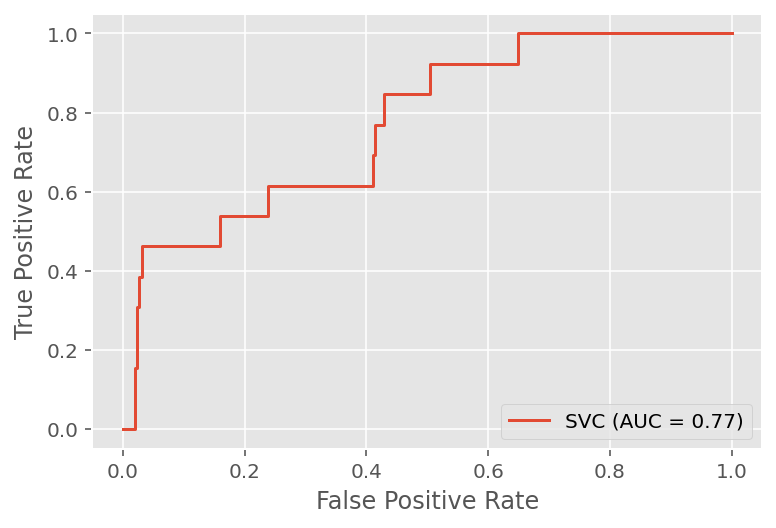

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

svc = SVC(random_state = 42)
svc.fit(X_train, y_train )
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()


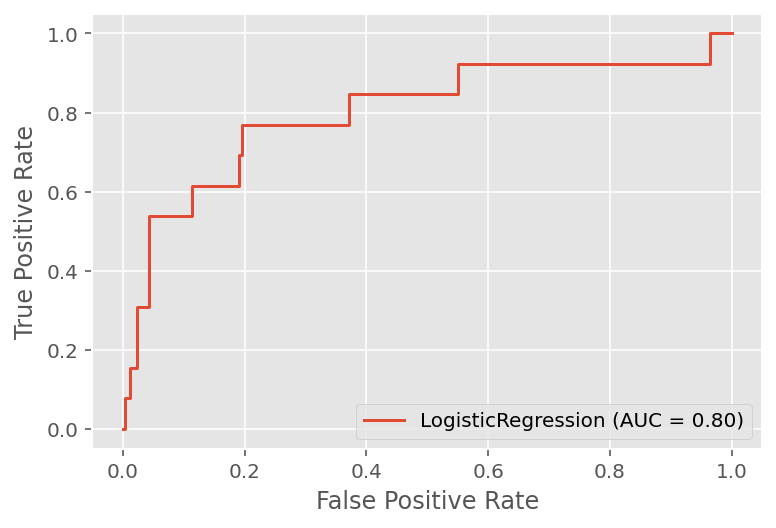

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)
log_disp = plot_roc_curve(log, X_test, y_test)
plt.show()

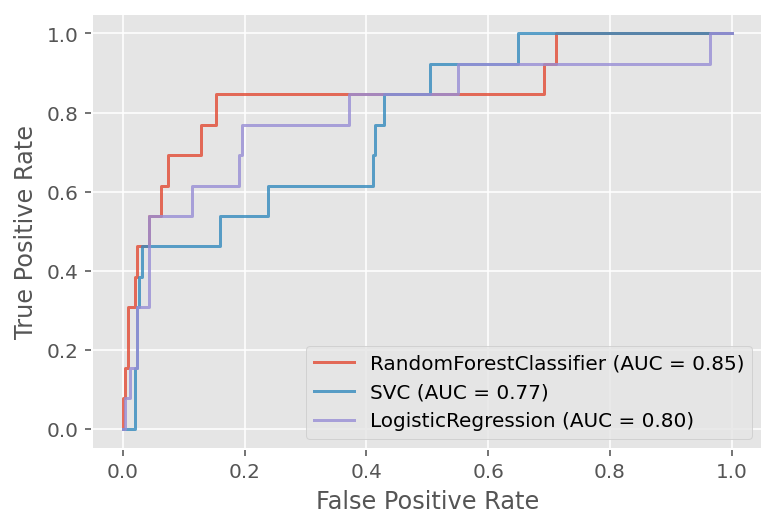

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax = ax, alpha= 0.8)
log_disp.plot(ax=ax, alpha=0.8)
plt.show()

예측에 사용된 특징들 중 가장 중요한 정도를 퍼센트로 표현하는 작업

[feature importance](https://hongl.tistory.com/129) - 참조 링크

Feature raking: 
1. V1_USUG (0.153)
2. V1_UPRO (0.104)
3. DBP1 (0.089)
4. SBP1 (0.077)
5. bmi_aft (0.075)
6. BMI_NEW (0.063)
7. V1_FHISTORY_DM (0.045)
8. V1_preg_dm (0.029)
9. V1_BMI (0.027)
10. preg_dm2 (0.027)
11. s1_test_date (0.024)
12. V1_glu_amt (0.023)
13. AGE_NEW (0.015)
14. gedu (0.012)
15. goccp (0.011)
16. v1_medu (0.009)
17. V1_AGE (0.009)
18. V1_METOPE (0.009)
19. V1_DRUG (0.009)
20. bef_cont (0.008)
21. moccp_t (0.008)
22. aft_sleep (0.008)
23. bef_sleep (0.007)
24. preg_med (0.007)
25. met_ope (0.007)
26. bef_folt (0.007)
27. v1_bp (0.007)
28. aft_iron (0.006)
29. V1_OPERATION (0.006)
30. childbirth_no (0.006)
31. bef_ink (0.006)
32. preg_htn2 (0.005)
33. V1_FHISTORY_HTN (0.005)
34. V1_preg_htn (0.005)
35. pre_birth (0.004)
36. v1_appe_oper (0.004)
37. aft_folt (0.004)
38. last_peri (0.004)
39. pre_ctra2 (0.004)
40. V1_misc (0.004)
41. v1_preg_how (0.004)
42. V1_PREGBLEED (0.004)
43. aft_vit (0.003)
44. allergy (0.003)
45. bef_vit (0.003)
46. v1_bef_ink (0.003)
47. preg_

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


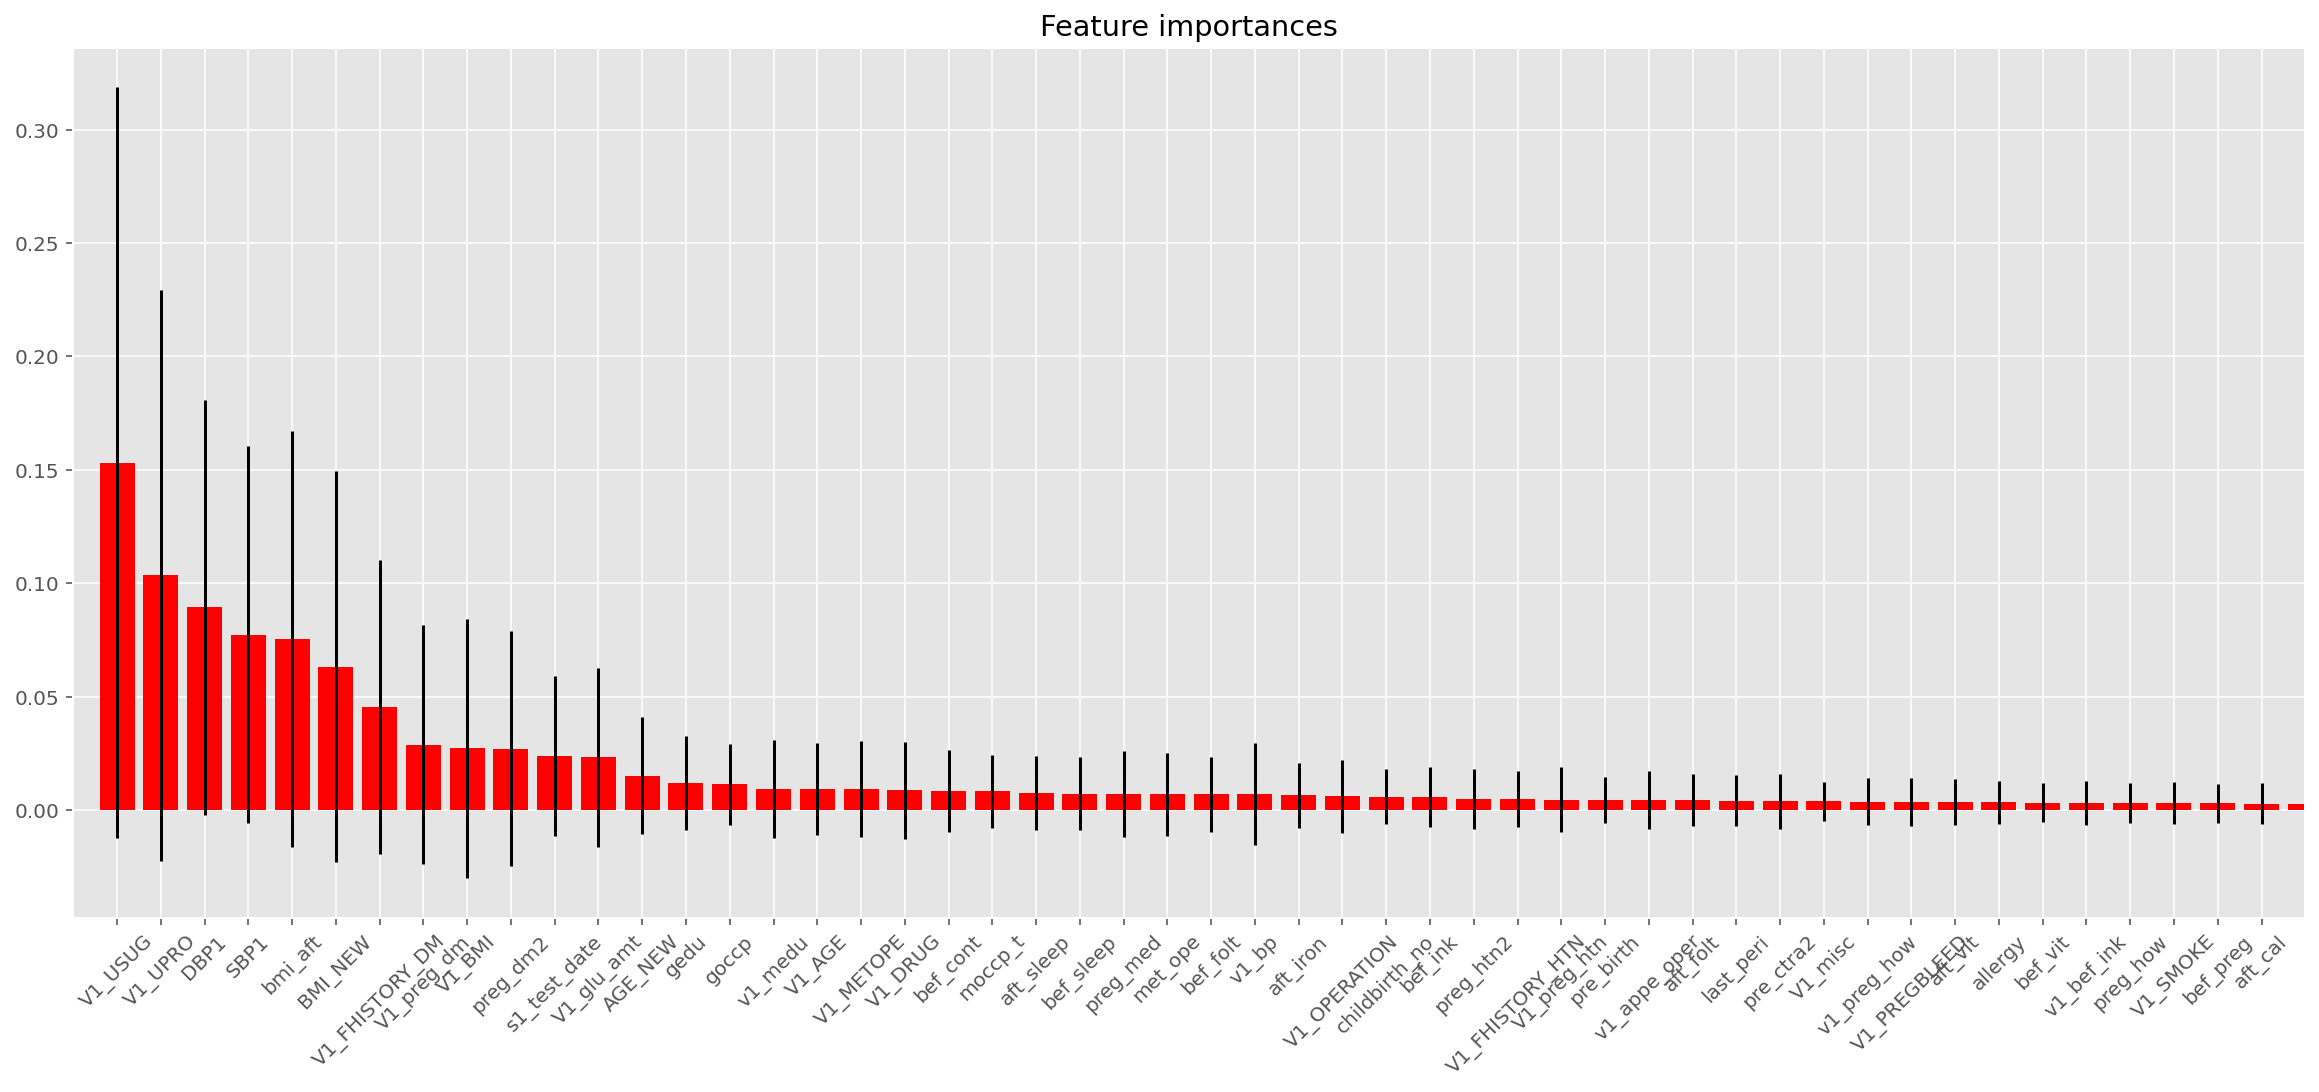

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature raking: ")

for f in range(50):
  print("{}. {} ({:.3f})".format(f + 1, df_mod.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize = (20,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(50), df_mod.columns[indices[0:50]], rotation=45)
plt.xlim([-1, 50])
plt.show()